# Costa Rican Household Poverty Level Prediction

Costa Rican Household Poverty Level Prediction is a Kaggle competition which is currently open for late submissions. This competition is for a social cause to help Inter-American Development Bank to identify which households have the highest need for social welfare assistance. Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify. Other than Costa Rica, many other countries also face this same problem of inaccurately assessing social need. If data scientists can generate an improvement, many countries can take benefit out of it.

The dataset available in Kaggle is a set of household characteristics from a representative sample of Costa Rican Households. The dataset has observations for each member of the household but the classification is done at the household level. This is a multi-class classification problem using a supervised machine learning approach. We classify households according to their income levels (1 = extreme poverty,  2 = moderate poverty, 3 = vulnerable households, 4 = non-vulnerable households). We have identified the multiclass classification algorithms which we think apt to use for this type of problems like, KNN, Logistic Regression, Naive Bayes, Random Forest etc. We will fine-tune the hyperparameters for each model and evaluate the different models using f1-score and accuracy metrics to find out the top best among them. Will do significance tests to figure out the optimal model to perform prediction.

Kaggle competition link:

https://www.kaggle.com/c/costa-rican-household-poverty-prediction (Links to an external site.)Links to an external site.
  

![image.png](attachment:image.png)

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline.

In [45]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Download the data

The data is located locally within this folder. 

In [54]:
%ls -l all/train.csv

-rw-rw-r-- 1 1000 1000 3237288 Nov 14 17:32 all/train.csv


In [55]:
import pandas as pd

In [56]:
full_train_data = pd.read_csv('all/train.csv')

In [57]:
train_data = pd.read_csv('all/train.csv')
test_data = pd.read_csv('all/test.csv')

# Exploratory Data Analysis

## Training dataset

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
train_data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

In [9]:
train_data.shape

(9557, 143)

In [10]:
pd.options.display.max_columns = 150
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [11]:
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [12]:
train_data.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.000000,-0.091732,0.443461,-0.073509,0.033551,0.088970,0.278364,0.302292,-0.081900,-0.002401,-0.059548,-0.072791,0.048169,-0.007806,-0.103959,0.032631,-0.043574,-0.064566,-0.051396,0.288006,-0.086238,-0.064566,0.290062,-0.101152,-0.174037,-0.037311,-0.134678,-0.053664,-0.025562,-0.015824,0.296623,-0.273600,NaN,NaN,-0.031581,-0.085837,-0.001022,0.011072,-0.029893,NaN,0.300238,0.055717,-0.055717,NaN,0.121159,NaN,NaN,-0.121159,-0.027800,0.141261,-0.132268,-0.035019,-0.023344,-0.017993,0.247867,-0.238980,-0.051818,0.122205,-0.066894,-0.093337,-0.041608,NaN,NaN,-0.129924,-0.242453,0.298101,-0.081504,-0.187258,0.221301,-0.124955,-0.202315,0.254528,-0.009161,-0.016410,0.016410,-0.044223,-0.072324,0.132792,0.038230,-0.061174,-0.026920,-0.007141,0.015678,0.042345,-0.010566,-0.059103,-0.028405,-0.058510,0.020017,-0.005813,-0.009135,0.024459,-0.004790,0.004421,-0.113882,0.048189,-0.036530,-0.064566,0.426544,-0.052032,-0.105092,-0.106630,-0.098785,-0.027489,-0.001094,0.023615,0.289269,0.227575,0.297657,-0.233023,NaN,0.226177,-0.226177,NaN,NaN,0.272942,0.041303,0.065360,0.108504,0.231539,-0.019377,-0.039030,-0.121150,-0.128111,-0.143357,0.112759,-0.112759,0.078897,0.358305,0.062343,-0.061309,0.364290,-0.082246,-0.191915,-0.061352,0.402561,0.062343,0.273559
hacdor,-0.091732,1.000000,-0.233369,0.652594,-0.175011,-0.101965,-0.084680,-0.049262,0.232508,0.059313,0.184857,0.268978,0.142458,0.264620,0.328901,0.134909,0.304282,0.304884,0.350948,-0.122134,0.047466,0.304884,-0.136055,0.074927,-0.027202,0.147449,0.083620,0.155120,-0.007622,-0.007622,-0.168472,0.077334,-0.006109,0.078103,0.232319,0.055087,-0.042053,-0.026698,-0.011166,-0.009338,-0.177257,-0.053838,0.060714,-0.011890,0.018548,-0.003526,-0.009338,-0.016256,0.102032,-0.018513,0.011347,-0.024871,-0.009984,-0.008644,-0.074592,0.052816,0.052003,-0.039592,-0.002982,0.049567,-0.007622,NaN,-0.007055,0.186977,0.053383,-0.165127,0.150780,0.046047,-0.144617,0.248834,0.035195,-0.188850,-0.013962,-0.010899,0.010899,0.101245,0.048446,-0.083512,-0.036129,-0.004175,-0.024646,-0.004303,-0.059319,-0.035260,0.014650,0.052828,0.019894,0.095210,-0.003598,-0.009773,-0.003996,-0.001394,0.031250,0.034400,0.316924,0.092055,-0.047062,0.304884,-0.108783,0.084845,0.043483,0.001882,-0.003503,-0.043254,-0.018611,-0.007391,-0.070758,-0.024871,-0.209735,0.670727,-0.063173,-0.066533,0.073560,0.151115,0.010075,-0.067109,-0.075837,-0.059923,0.004046,-0.042086,0.017444,0.025546,-0.010172,0.037182,0.005289,0.027721,-0.027721,-0.118168,-0.109862,-0.102725,0.350546,-0.082229,0.388043,0.794699,0.005278,-0.099153,-0.102725,-0.191714
rooms,0.443461,-0.233369,1.000000,-0.213368,0.129183,0.130531,0.254256,0.2

### Number of Null Columns.

In [13]:
pd.options.display.max_rows = 150
train_data.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

 ### Columns with Null values arranged descending. 

1. rez_esc -- 7928 
2. v18q1   -- 7342
3. v2a1    -- 6860
4. meaneduc -- 5
5. SQBmeaned -- 5
    
    

### Object columns

In [37]:
train_data.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and idhogar are identifying variables. Values of other columns are a mix of numbers and strings. 

### Target Value counts

In [40]:
train_dat = train_data
train_dat['target_desc'] = train_data['Target']
train_dat['target_desc']=train_dat['target_desc'].apply(str)

In [41]:
train_dat['target_desc'] = train_dat['target_desc'].map({'1': 'extreme poverty' ,'2' : 'moderate poverty', 
                              '3' :'vulnerable households', '4' : 'non vulnerable households'})

In [42]:
train_dat.target_desc.value_counts()

non vulnerable households    5996
moderate poverty             1597
vulnerable households        1209
extreme poverty               755
Name: target_desc, dtype: int64

In [44]:
train_dat.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,target_desc
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4,non vulnerable households
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4,non vulnerable households
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4,non vulnerable households
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4,non vulnerable households
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4,non vulnerable households


### Visualization

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


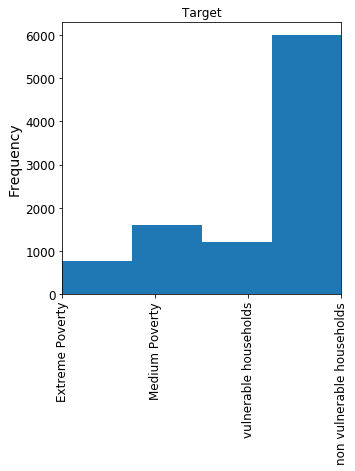

In [65]:
%matplotlib inline
val = ["Extreme Poverty", "Medium Poverty", "vulnerable households", "non vulnerable households"]
import matplotlib.pyplot as plt
train_data.Target.hist(bins=4, figsize=(5,5))
plt.title("Target")
plt.ylabel("Frequency")
plt.xlim([1,4])
plt.xticks([1,2,3,4],val, rotation=90)
#plt.xticks()
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


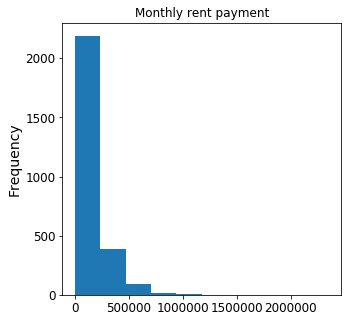

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.v2a1.hist(figsize=(5,5))
plt.title("Monthly rent payment")
plt.ylabel("Frequency")
#plt.xticks()
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


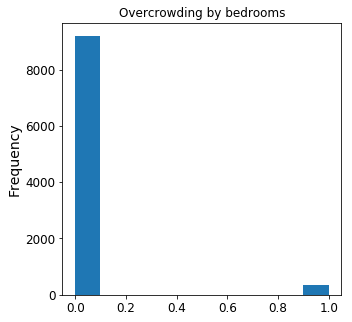

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hacdor.hist(figsize=(5,5))
plt.title("Overcrowding by bedrooms")
plt.ylabel("Frequency")
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


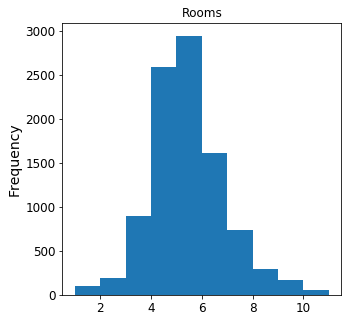

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.rooms.hist(figsize=(5,5))
plt.title("Rooms")
plt.ylabel("Frequency")
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


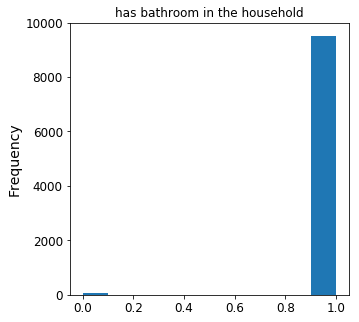

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.v14a.hist(figsize=(5,5))
plt.title("has bathroom in the household")
plt.ylabel("Frequency")
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


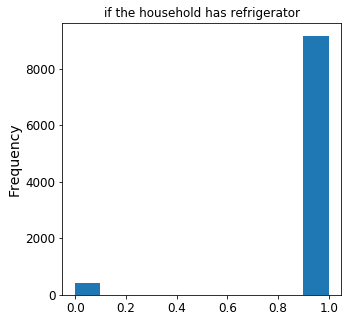

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.refrig.hist(figsize=(5,5))
plt.title("if the household has refrigerator")
plt.ylabel("Frequency")
plt.grid("off")
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


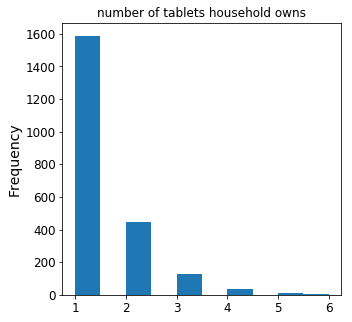

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.v18q1.hist(figsize=(5,5))
plt.title("number of tablets household owns")
plt.ylabel("Frequency")
plt.grid("off")
plt.show()

## Test Dataset

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [25]:
test_data.shape

(23856, 142)

In [26]:
pd.options.display.max_columns = 150
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [31]:
pd.options.display.max_rows = 150
test_data.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
refrig                 0
v18q                   0
v18q1              18126
r4h1                   0
r4h2                   0
r4h3                   0
r4m1                   0
r4m2                   0
r4m3                   0
r4t1                   0
r4t2                   0
r4t3                   0
tamhog                 0
tamviv                 0
escolari               0
rez_esc            19653
hhsize                 0
paredblolad            0
paredzocalo            0
paredpreb              0
pareddes               0
paredmad               0
paredzinc              0
paredfibras            0
paredother             0
pisomoscer             0
pisocemento            0
pisoother              0
pisonatur              0
pisonotiene            0
pisomadera             0
techozinc              0
techoentrepiso         0
techocane              0


 ### Columns with Null values arranged descending. 

1. v18q1   -- 18126
2. v2a1    -- 17403
3. meaneduc -- 31
4. SQBmeaned -- 31

# Data Pre-processing

## Handling Missing Data

### v18q1

- v18q -->  owns a tablet
- v18q1 --> number of tablets household owns

- v18q1-- Train data have around 7342 missing values. We can try to compare this missing values with the v18q to see if any of these owns a tables. If none then we can replace the value directly with 0.


In [73]:
## v18q1  --- This is number of tablet owned by a family.

heads_train = train_data.loc[train_data['parentesco1'] == 1].copy()
heads_train.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

##This shows that every member have null v18q1 have 0 in v18q. So we can safely replace the 



v18q
0    2318
1       0
Name: v18q1, dtype: int64

In [74]:
heads_test = test_data.loc[test_data['parentesco1'] == 1].copy()
heads_test.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())


v18q
0    5726
1       0
Name: v18q1, dtype: int64

In [75]:
train_data['v18q1'] = train_data['v18q1'].fillna(0)
test_data['v18q1'] = test_data['v18q1'].fillna(0)

### rez_esc

- rez_esc --> Years behind school can be filled with 0 

In [79]:
data['rez_esc'].describe()

count    9557.000000
mean        0.078372
std         0.427241
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: rez_esc, dtype: float64

In [76]:
train_data['rez_esc'] = train_data['rez_esc'].fillna(0)
test_data['rez_esc'] = test_data['rez_esc'].fillna(0)

### v2a1

There could be known reason for missing monthly payment or missing values here. 

- 1. The person can have his own home.We will set the value to 0 for such cases. 
- 2. Other missing due to unknown reason, we will impute the median value within pipeline 



In [77]:
# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0


### meaneduc and SQBmeaned

- meaneduc and SQBmeaned are related. SQBmeaned is the square of meaneduc. Both values are missing for 31 observations and we can impute it with median

### Fill in object columns 

- Fill in string values of below columns with "yes" = 1 and "no" = 0

- dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0


In [58]:
mapping = {"yes": 1, "no": 0}

# Fill in the values with the correct mapping
train_data['dependency'] = train_data['dependency'].replace(mapping).astype(np.float64)
train_data['edjefa'] = train_data['edjefa'].replace(mapping).astype(np.float64)
train_data['edjefe'] = train_data['edjefe'].replace(mapping).astype(np.float64)

train_data[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


### Label distribution household level

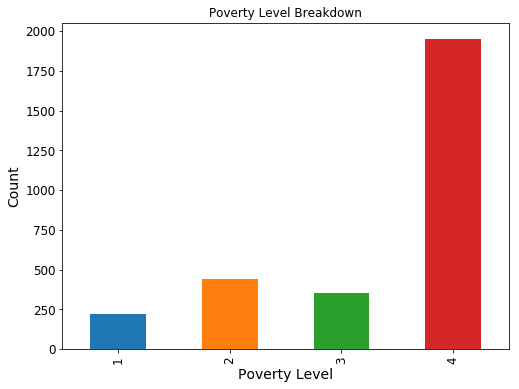

In [67]:
data = train_data

heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.title('Poverty Level Breakdown');


In [68]:
label_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

#### Validate and identify errors

- Some of the labels are not correct because individuals in the same household have a different poverty level. We can use the head of household as the true label.

In [69]:
# Groupby the household and figure out the number of unique values
all_equal = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [71]:
data[data['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [72]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(data[(data['idhogar'] == household) & (data['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    data.loc[data['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


# Feature Engineering

We should consolidate our data at a household level. 
We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (groupby) and performing an aggregation (agg) of the individual variables.



The process is as follows

    1.Break variables into household level and invididual level
    2.Find suitable aggregations for the individual level data
        - Ordinal variables can use statistical aggregations
        - Boolean variables can also be aggregated but with fewer stats
    3.Join the individual aggregations to the household level data


There are several different categories of variables:

    1.Individual Variables: these are characteristics of each individual rather than the household
        Boolean: Yes or No (0 or 1)
        Ordered Discrete: Integers with an ordering
    2.Household variables
        Boolean: Yes or No
        Ordered Discrete: Integers with an ordering
        Continuous numeric
    3.Squared Variables: derived from squaring variables in the data
    4.Id variables: identifies the data and should not be used as features


In [81]:
id_ = ['Id', 'idhogar', 'Target']

In [82]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

In [83]:
ind_ordered = ['rez_esc', 'escolari', 'age']

In [84]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

In [85]:
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

In [86]:
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [87]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


In [88]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


## Remove Squared variables

- Squared variables can be removed from the list of features as original feature is aleady part of the dataset and both are highly correlated

In [90]:
data = data.drop(columns = sqr_)
data.shape

(9557, 134)

## Household level variables

In [91]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

### Remove unnecessary Household Variables

- We can remove highly correlated variables keeping just one out of them.

In [93]:
# Create correlation matrix
corr_matrix = heads.corr()
corr_matrix

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,1.000000,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,-0.136275,1.000000,0.624324,-0.143713,-0.055073,-0.105112,0.053262,-0.021422,0.060396,0.139910,0.072131,0.101985,-0.006039,-0.005401,-0.130923,-0.003818,0.068883,0.191171,0.045614,-0.037777,-0.021824,-0.008108,-0.007148,-0.134352,-0.051855,0.058215,-0.008967,0.015910,-0.003818,-0.008108,-0.013844,0.088413,-0.006580,-0.002880,-0.016964,-0.007148,-0.010478,-0.050384,0.042438,0.023042,-0.027280,0.001265,0.032345,-0.005401,NaN,-0.005401,0.150762,0.047898,-0.137802,0.122137,0.038463,-0.119052,0.190081,0.034392,-0.149066,-0.064282,-0.047444,0.052335,0.151861,0.021870,-0.048189,-0.040258,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.013642,0.012861,-0.050166,-0.017828,-0.067632,0.583197,-0.181283,0.186709,0.057368,0.147793,0.220037,0.105136,0.200622,0.268084,0.110120,0.233964,-0.056616,0.234749,0.283206,0.234749,0.256228,0.074122,-0.046097,0.234749,-0.162266,0.030302
hacapo,-0.096313,0.624324,1.000000,-0.154749,-0.062110,-0.092562,0.036795,-0.020661,0.062616,0.124520,0.066715,0.111904,-0.004544,-0.004064,-0.124567,-0.002873,-0.003519,0.206423,0.032552,-0.048015,-0.016422,-0.006101,-0.005379,-0.125825,-0.048910,0.054289,-0.006747,-0.008789,-0.002873,-0.006101,0.010760,0.122333,-0.022836,-0.008292,0.041293,-0.005379,-0.007884,-0.044062,0.018669,0.063279,-0.046656,0.016337,0.045107,-0.004064,NaN,-0.004064,0.114890,0.032241,-0.101011,0.102290,0.006424,-0.076188,0.193764,0.000453,-0.120487,-0.034762,-0.035699,0.027959,0.110707,0.010169,-0.036260,-0.038271,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.016778,0.002864,-0.042787,-0.028024,-0.076277,0.445405,-0.172382,0.174432,0.088729,0.168476,0.183967,0.064559,0.149317,0.236029,0.105777,0.213128,-0.045953,0.213700,0.263010,0.213700,0.204935,0.099435,-0.027500,0.213700,-0.102256,0.044939
v14a,0.068230,-0.143713,-0.154749,1.000000,0.192954,0.075308,-0.011317,0.001342,-0.015043,-0.188425,-0.057004,0.007657,0.003113,0.002784,0.098117,0.001968,-0.138091,-0.070795,-0.105688,0.085378,0.011248,0.004179,0.003684,0.084577,0.186949,-0.173224,-0.068852,0.029051,0.001968,-0.158222,0.012141,-0.624212,0.019500,0.091473,-0.030463,0.003684,-0.246445,0.058683,-0.004059,-0.046878,

In [94]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [95]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


tamviv is not necessarily the same as hhsize because there might be family members that are not living in the household.

In [96]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

### Create variable electricity

Compress below 4 variables and create an ordinal variable

0: No electricity
1: Electricity from cooperative
2: Electricity from CNFL, ICA, ESPH/JASEC
3: Electricity from private plant

In [97]:
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [98]:
# Record the new variable
heads['elec'] = elec

In [99]:
# Remove the electricity columns
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])


### Remove area2

This means the house is in a rural zone, but it's redundant because we have a column indicating if the house is in a urban zone. Therefore, we can drop this column.

In [100]:
heads = heads.drop(columns = 'area2')

### Creating ordinal variables

We can combine the Boolean variables for walls, roof and floor and create an ordinal variable for each respectively.

In [101]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)


In [102]:
heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

In [104]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

### Combine walls, roof and floor

- Lowest poverty levels tends to have higher values for house quality variable

In [105]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

### Create new variable 'Less_quality'

- Combine No toilet, no electricity, no floor, no water service, no ceiling


In [114]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['less_quality'] = -1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

In [117]:
heads['less_quality'].tail()

9535   -1
9541   -2
9545   -1
9551    0
9552    0
Name: less_quality, dtype: int64

### Create new variable 'High_quality'

- Create a new variable combining variables for a refrigerator, computer, tablet, or television.

In [118]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])


## Create per capita variables

In [119]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']


## Individual level variables

In [121]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [122]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

This is opposite of male and can be removed

In [123]:
ind = ind.drop(columns = 'male')

### New variable - escolari/age

In [131]:
ind['escolari/age'] = ind['escolari'] / ind['age']
newind = ind

## Aggregate data for household

In order to incorporate the individual data into the household data, we need to aggregate it for each household. The simplest way to do this is to groupby the family id idhogar and then agg the data. For the aggregations for ordered or continuous variables, we can use six, five of which are built in to pandas, and one of which we define ourselves range_. 

In [132]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = newind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                           female  \
           min max sum count  std range_ min max sum count  std range_    min   
idhogar                                                                         
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.0      0      1   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.0      0      0   
004616164    0   0   0     2  0.0      0   0   0   0     2  0.0      0      0   
004983866    0   0   0     2  0.0      0   0   0   0     2  0.0      0      0   
005905417    0   0   0     3  0.0      0   0   0   0     3  0.0      0      0   

                                         estadocivil1                          \
          max sum count       std range_          min max sum count       std   
idhogar                                                                         
001ff74ca   1   2     2  0.000000      0            0   1   1     2  0.707107   
003123ec2   1   1     4  0.500000      1            0   1   2     4  0.577350   
004616164   0   0     2  0.000000      0            0   0   0     2  0.000000   
004983866   1   1     2  0.707107      1            0   0   0     2  0.000000   
005905417   1   1     3  0.577350      1            0   1   1     3  0.577350   

                 estadocivil2                               estadocivil3      \
          range_          min max sum count      std range_          min max   
idhogar                                                                        
001ff74ca      1            0   0   0     2  0.00000      0            0   0   
003123ec2      1            0   1   2     4  0.57735      1            0   0   
004616164      0            0   0   0     2  0.00000      0            0   0   
004983866      0            0   0   0     2  0.00000      0            0   0   
005905417      1            0   0   0     3  0.00000      0            0   0   

                                estadocivil4                            \
          sum count  std range_          min max sum count  std range_   
idhogar                                                                  
001ff74ca   0     2  0.0      0            0   0   0     2  0.0      0   
003123ec2   0     4  0.0      0            0   0   0     4  0.0      0   
004616164   0     2  0.0      0            0   0   0     2  0.0      0   
004983866   0     2  0.0      0            0   0   0     2  0.0      0   
005905417   0     3  0.0      0            0   0   0     3  0.0      0   

          estadocivil5                                estadocivil6          \
                   min max sum count       std range_          min max sum   
idhogar                                                                      
001ff74ca            0   1   1     2  0.707107      1            0   0   0   
003123ec2            0   0   0     4  0.000000      0            0   0   0   
004616164            0   0   0     2  0.000000      0            0   1   1   
004983866            0   0   0     2  0.000000      0            0   1   1   
005905417            0   1   1     3  0.577350      1            0   0   0   

                                 estadocivil7                                 \
          count       std range_          min max sum count       std range_   
idhogar                                                                        
001ff74ca     2  0.000000      0            0   0   0     2  0.000000      0   
003123ec2     4  0.000000      0            0   0   0     4  0.000000      0   
004616164     2  0.707107      1            0   1   1     2  0.707107      1   
004983866     2  0.707107      1            0   1   1     2  0.707107      1   
005905417     3  0.000000      0            0   1   1     3  0.577350      1   

          parentesco1                                parentesco2          \
                  min max sum count       std range_         min max sum   
idhogar                                                     

In [133]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(c+stat)
        


In [134]:
new_col


['v18qmin',
 'v18qmax',
 'v18qsum',
 'v18qcount',
 'v18qstd',
 'v18qrange_',
 'dismin',
 'dismax',
 'dissum',
 'discount',
 'disstd',
 'disrange_',
 'femalemin',
 'femalemax',
 'femalesum',
 'femalecount',
 'femalestd',
 'femalerange_',
 'estadocivil1min',
 'estadocivil1max',
 'estadocivil1sum',
 'estadocivil1count',
 'estadocivil1std',
 'estadocivil1range_',
 'estadocivil2min',
 'estadocivil2max',
 'estadocivil2sum',
 'estadocivil2count',
 'estadocivil2std',
 'estadocivil2range_',
 'estadocivil3min',
 'estadocivil3max',
 'estadocivil3sum',
 'estadocivil3count',
 'estadocivil3std',
 'estadocivil3range_',
 'estadocivil4min',
 'estadocivil4max',
 'estadocivil4sum',
 'estadocivil4count',
 'estadocivil4std',
 'estadocivil4range_',
 'estadocivil5min',
 'estadocivil5max',
 'estadocivil5sum',
 'estadocivil5count',
 'estadocivil5std',
 'estadocivil5range_',
 'estadocivil6min',
 'estadocivil6max',
 'estadocivil6sum',
 'estadocivil6count',
 'estadocivil6std',
 'estadocivil6range_',
 'estadocivil

In [135]:
ind_agg.columns = new_col
ind_agg.head()

,v18qmin,v18qmax,v18qsum,v18qcount,v18qstd,v18qrange_,dismin,dismax,dissum,discount,disstd,disrange_,femalemin,femalemax,femalesum,femalecount,femalestd,femalerange_,estadocivil1min,estadocivil1max,estadocivil1sum,estadocivil1count,estadocivil1std,estadocivil1range_,estadocivil2min,estadocivil2max,estadocivil2sum,estadocivil2count,estadocivil2std,estadocivil2range_,estadocivil3min,estadocivil3max,estadocivil3sum,estadocivil3count,estadocivil3std,estadocivil3range_,estadocivil4min,estadocivil4max,estadocivil4sum,estadocivil4count,estadocivil4std,estadocivil4range_,estadocivil5min,estadocivil5max,estadocivil5sum,estadocivil5count,estadocivil5std,estadocivil5range_,estadocivil6min,estadocivil6max,estadocivil6sum,estadocivil6count,estadocivil6std,estadocivil6range_,estadocivil7min,estadocivil7max,estadocivil7sum,estadocivil7count,estadocivil7std,estadocivil7range_,parentesco1min,parentesco1max,parentesco1sum,parentesco1count,parentesco1std,parentesco1range_,parentesco2min,parentesco2max,parentesco2sum,parentesco2count,parentesco2std,parentesco2range_,parentesco3min,parentesco3max,parentesco3sum,...,instlevel2count,instlevel2std,instlevel2range_,instlevel3min,instlevel3max,instlevel3sum,instlevel3count,instlevel3std,instlevel3range_,instlevel4min,instlevel4max,instlevel4sum,instlevel4count,instlevel4std,instlevel4range_,instlevel5min,instlevel5max,instlevel5sum,instlevel5count,instlevel5std,instlevel5range_,instlevel6min,instlevel6max,instlevel6sum,instlevel6count,instlevel6std,instlevel6range_,instlevel7min,instlevel7max,instlevel7sum,instlevel7count,instlevel7std,instlevel7range_,instlevel8min,instlevel8max,instlevel8sum,instlevel8count,instlevel8std,instlevel8range_,instlevel9min,instlevel9max,instlevel9sum,instlevel9count,instlevel9std,instlevel9range_,mobilephonemin,mobilephonemax,mobilephonesum,mobilephonecount,mobilephonestd,mobilephonerange_,rez_escmin,rez_escmax,rez_escsum,rez_esccount,rez_escstd,rez_escrange_,escolarimin,escolarimax,escolarisum,escolaricount,escolaristd,escolarirange_,agemin,agemax,agesum,agecount,agestd,agerange_,escolari/agemin,escolari/agemax,escolari/agesum,escolari/agecount,escolari/agestd,escolari/agerange_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.0,0,1,1,2,2,0.000000,0,0,1,1,2,0.707107,1,0,0,0,2,0.00000,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.000000,0,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,0,1,1,...,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.000000,0.0,0,16,16,2,11.313708,16,0,38,38,2,26.870058,38,0.421053,0.421053,0.421053,1,NaN,0.000000
003123ec2,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,1,1,4,0.500000,1,0,1,2,4,0.577350,1,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.000000,0,0,0,0,4,0.000000,0,0,1,1,4,0.500000,1,0,1,1,4,0.5,1,0,1,2,...,4,0.000000,0,0,1,1,4,0.5,1,0,1,1,4,0.50000,1,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,4,0.000000,0.0,0,7,13,4,3.774917,7,1,24,51,4,12.446552,23,0.000000,0.304348,0.554348,4,0.161557,0.304348
004616164,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,0,1,1,...,2,0.707107,1,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.000000,0.0,3,11,14,2,5.656854,8,16,50,66,2,24.041631,34,0.060000,0.687500,0.747500,2,0.443710,0.627500
004983866,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,0,0,0,...,2,0.000000,0

# Feature Selection

Remove one out of every pair of variables with a correlation greater than 0.95.

In [138]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

len(to_drop)


101

In [139]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)


Final features shape:  (2973, 210)


In [140]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,...,parentesco3sum,parentesco4min,parentesco4max,parentesco4sum,parentesco5min,parentesco5max,parentesco6min,parentesco6max,parentesco6sum,parentesco7min,parentesco7max,parentesco8min,parentesco8max,parentesco9min,parentesco9max,parentesco9sum,parentesco10min,parentesco10max,parentesco10sum,parentesco11min,parentesco11max,parentesco11sum,parentesco12min,parentesco12max,parentesco12sum,instlevel1min,instlevel1max,instlevel1sum,instlevel2min,instlevel2max,instlevel2sum,instlevel2std,instlevel3min,instlevel3max,instlevel3sum,instlevel3std,instlevel4min,instlevel4max,instlevel4sum,instlevel4std,instlevel5min,instlevel5max,instlevel5sum,instlevel6min,instlevel6max,instlevel6sum,instlevel7min,instlevel7max,instlevel7sum,instlevel8min,instlevel8max,instlevel8sum,instlevel8std,instlevel9min,instlevel9max,mobilephonemin,mobilephonestd,mobilephonerange_,rez_escmin,rez_escmax,escolarimin,escolarimax,escolarisum,escolaristd,escolarirange_,agemin,agemax,agesum,agestd,agerange_,escolari/agemin,escolari/agemax,escolari/agesum,escolari/agestd,escolari/agerange_
0,ID_279628684,21eb7fcc1,4,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000
1,ID_f29eb3ddd,0e5d7a658,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000
2,ID_68de51c94,2c7317ea8,4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000
3,ID_ec05b1a7b,2b58d945f,4,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,2,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,0.250000,0.529412,1.366183,0.126943,0.279412
4,ID_1284f8aad,d6dae86b7,4,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,0.000000,0.392857,0.965584,0.168946,0.392857


In [141]:
corrs = final.corr()['Target']

In [142]:
corrs.sort_values().head()

instlevel2sum   -0.297868
instlevel1sum   -0.271204
hogar_nin       -0.266309
r4t1            -0.260917
instlevel2max   -0.251575
Name: Target, dtype: float64